# Practical work 3 : MLP, part 3

## 2-layers MLP for XOR learning 

Nos modèles précédents ne pouvaient apprenrd qu'un seul exemple codé en dur dans le modèle.
Dans ce Notebook, les entrées deviennet des paramètres d'entre du modèle.
Ainsi le modèle pourra réaliser des prédictions sur n'importe quel exemple et en apprendre autant que l'on veut.
Pour l'apprentissage de la fonction XOR il nous faut définir les 4 exemples à 2 entrées qui correspondent aux différentes configurations d'entrée de la porte logique et les 4 sorties désirées correspondantes:
* si les deux entrées sont différentes, le neurone 1 de sortie est à 1 et le neurone 2 à 0;
* si les deux entrées sont identiques, à l'inverse le neurone 1 de sortie est à 0 et le neurone 2 de sortie à 1.
On sopubhaite également récupétrer les prédictions à l'issue d'une étape de propagation. La fonction `forward` doit donc reourner les prédictions (état des neurones de sortie).
Comme il nous faut également réupérer les valeurs de la perte, ces dernières seront récupérées via une méthode `loss()` définie dans la classe.

Ecrire la classe `XORModel` permettant de réaliser un apprentissage comme suit:

```python
    xor_model = XORModel()
    lr = 0.001
    L = []
    num_epochs = 1000
    X = []  # placer les exemples ici
    Y = []  # placer les sorties désirées ici
    for epoch in range(num_epochs):
        for ex in range(len(X)):
            x1, x2 = X[ex]
            y1, y2 = Y[ex]
            [ypred1, ypred2] = xor_model.forward(x1, x2, y1, y2)
            L.append(xor_model.loss())
            xor_model.backward()
            xor_model.optimizerSGD(lr)
            print(f"Epoch {epoch}, sample {ex}  - Loss: {loss}")
```

L'optimizer est de type SGD (Stochastic Gradient Descent): Les poids sont modifiés après chaque passage d'un exemple.

Schéma du réseau à réaliser est le même que dans le précédent Notebook:

<img src="./MLP2-a.jpg" width="400" align="center"/>

## Solution

In [1]:
import op

class XORModel:

    def __init__(self):
        # Loss
        self.L = 0

        # Desired outputs
        self.y2_1 = op.PlaceHolder(0)
        self.y2_2 = op.PlaceHolder(0)

        # Inputs
        self.x1 = op.PlaceHolder(0)
        self.x2 = op.PlaceHolder(0)

        # Layer 1 - Neuron 1
        self.w1_11 = op.Parameter(-1)
        self.w1_12 = op.Parameter(2)
        self.mul1_11 = op.Mul()
        self.mul1_12 = op.Mul()
        self.add1_11 = op.Add()
        self.b1_1 = op.Parameter(4)
        self.add1_12 = op.Add()
        self.sigma1_1 = op.Tanh()

        # Layer 1 - Neuron 2
        self.w1_21 = op.Parameter(-1)
        self.w1_22 = op.Parameter(1)
        self.mul1_21 = op.Mul()
        self.mul1_22 = op.Mul()
        self.add1_21 = op.Add()
        self.b1_2 = op.Parameter(-1)
        self.add1_22 = op.Add()
        self.sigma1_2 = op.Tanh()

        # Layer 2 - Neuron 1
        self.w2_11 = op.Parameter(-1)
        self.w2_12 = op.Parameter(2)
        self.mul2_11 = op.Mul()
        self.mul2_12 = op.Mul()
        self.add2_11 = op.Add()
        self.b2_1 = op.Parameter(4)
        self.add2_12 = op.Add()
        self.sigma2_1 = op.Tanh()

        # Layer 2 - Neuron 2
        self.w2_21 = op.Parameter(-1)
        self.w2_22 = op.Parameter(1)
        self.mul2_21 = op.Mul()
        self.mul2_22 = op.Mul()
        self.add2_21 = op.Add()
        self.b2_2 = op.Parameter(-1)
        self.add2_22 = op.Add()
        self.sigma2_2 = op.Tanh()

        # Error / Loss
        self.err1 = op.Sub()
        self.err2 = op.Sub()
        self.mse1 = op.Square()
        self.mse2 = op.Square()
        self.mseT = op.Add()

    def forward(self, x1, x2, y1, y2):
        # Desired outputs
        self.y2_1.set(y1)
        self.y2_2.set(y2)

        # Set inputs values
        self.x1.set(x1)
        self.x2.set(x2)

        # Forward Layer 1 neuron 1
        e1_11 = self.mul1_11(self.x1(), self.w1_11())
        e1_12 = self.mul1_12(self.x2(), self.w1_12())
        v1_10 = self.add1_11(e1_11, e1_12)
        v1_1 = self.add1_12(v1_10, self.b1_1())
        y1_1 = self.sigma1_1(v1_1)

        # Forward Layer 1 neuron 2
        e1_21 = self.mul1_21(self.x1(), self.w1_21())
        e1_22 = self.mul1_22(self.x2(), self.w1_22())
        v1_20 = self.add1_21(e1_21, e1_22)
        v1_2 = self.add1_22(v1_20, self.b1_2())
        y1_2 = self.sigma1_2(v1_2)

        # Forward Layer 2 neuron 1
        e2_11 = self.mul2_11(y1_1, self.w2_11())
        e2_12 = self.mul2_12(y1_2, self.w2_12())
        v2_10 = self.add2_11(e2_11, e2_12)
        v2_1 = self.add2_12(v2_10, self.b2_1())
        ypred_1 = self.sigma2_1(v2_1)

        # Forward Layer 2 neuron 2
        e2_21 = self.mul2_21(y1_1, self.w2_21())
        e2_22 = self.mul2_22(y1_2, self.w2_22())
        v2_20 = self.add2_21(e2_21, e2_22)
        v2_2 = self.add2_22(v2_20, self.b2_2())
        ypred_2 = self.sigma2_2(v2_2)

        # Error
        error1 = self.err1(ypred_1, self.y2_1())
        error2 = self.err2(ypred_2, self.y2_2())
        mserror1 = self.mse1(error1)
        mserror2 = self.mse2(error2)

        # Store loss
        self.L = self.mseT(mserror1, mserror2)

        # Return prediction
        return [ypred_1, ypred_2]

    def loss(self):
        return self.L


    def backward(self):
        g_L = 1

        # Backward Layer 2 neuron 1
        g_mserror1 = self.mseT.grad1(g_L)
        g_error1 = self.mse1.grad(g_mserror1)
        g_ypred_1 = self.err1.grad1(g_error1)
        g_v2_1 = self.sigma2_1.grad(g_ypred_1)
        g_v2_10 = self.add2_12.grad1(g_v2_1)
        self.g_b2_1 = self.add2_12.grad2(g_v2_1)
        g_e2_11 = self.mul2_11.grad1(g_v2_10)
        self.g_w2_11 = self.mul2_11.grad2(g_v2_10)
        g_e2_12 = self.mul2_12.grad1(g_v2_10)
        self.g_w2_12 = self.mul2_12.grad2(g_v2_10)

        # Backward Layer 2 neuron 2
        g_mserror2 = self.mseT.grad2(g_L)
        g_error2 = self.mse2.grad(g_mserror2)
        g_ypred_2 = self.err2.grad1(g_error2)
        g_v2_2 = self.sigma2_2.grad(g_ypred_2)
        g_v2_20 = self.add2_22.grad1(g_v2_2)
        self.g_b2_2 = self.add2_22.grad2(g_v2_2)
        g_e2_21 = self.mul2_21.grad1(g_v2_20)
        self.g_w2_21 = self.mul2_21.grad2(g_v2_20)
        g_e2_22 = self.mul2_22.grad1(g_v2_20)
        self.g_w2_22 = self.mul2_22.grad2(g_v2_20)

        # Backward Layer 1 neuron 1
        g_v1_1 = self.sigma1_1.grad(g_e2_11 + g_e2_21)
        g_v1_10 = self.add1_12.grad1(g_v1_1)
        self.g_b1_1 = self.add1_12.grad2(g_v1_1)
        self.g_w1_11 = self.mul1_11.grad2(g_v1_10)
        self.g_w1_12 = self.mul1_12.grad2(g_v1_10)

        # Backward Layer 1 neuron 2
        g_v1_2 = self.sigma1_2.grad(g_e2_12 + g_e2_22)
        g_v1_20 = self.add1_22.grad1(g_v1_2)
        self.g_b1_2 = self.add1_22.grad2(g_v1_2)
        self.g_w1_21 = self.mul1_21.grad2(g_v1_20)
        self.g_w1_22 = self.mul1_22.grad2(g_v1_20)

    def optimizerSGD(self, lr):
        """Stochastic Gradient Descent"""
        self.w2_11.update(self.w2_11() - lr * self.g_w2_11)
        self.w2_12.update(self.w2_12() - lr * self.g_w2_12)
        self.b2_1.update(self.b2_1() - lr * self.g_b2_1)
        self.w2_21.update(self.w2_21() - lr * self.g_w2_21)
        self.w2_22.update(self.w2_22() - lr * self.g_w2_22)
        self.b2_2.update(self.b2_2() - lr * self.g_b2_2)
        self.w1_11.update(self.w1_11() - lr * self.g_w1_11)
        self.w1_12.update(self.w1_12() - lr * self.g_w1_12)
        self.b1_1.update(self.b1_1() - lr * self.g_b1_1)
        self.w1_21.update(self.w1_21() - lr * self.g_w1_21)
        self.w1_22.update(self.w1_22() - lr * self.g_w1_22)
        self.b1_2.update(self.b1_2() - lr * self.g_b1_2)

    def optimizerBGD(self, lr):
        "Batch Gradient Descent."
        self.w2_11.update(self.w2_11() - lr * self.g_w2_11)
        self.w2_12.update(self.w2_12() - lr * self.g_w2_12)
        self.b2_1.update(self.b2_1() - lr * self.g_b2_1)
        self.w2_21.update(self.w2_21() - lr * self.g_w2_21)
        self.w2_22.update(self.w2_22() - lr * self.g_w2_22)
        self.b2_2.update(self.b2_2() - lr * self.g_b2_2)
        self.w1_11.update(self.w1_11() - lr * self.g_w1_11)
        self.w1_12.update(self.w1_12() - lr * self.g_w1_12)
        self.b1_1.update(self.b1_1() - lr * self.g_b1_1)
        self.w1_21.update(self.w1_21() - lr * self.g_w1_21)
        self.w1_22.update(self.w1_22() - lr * self.g_w1_22)
        self.b1_2.update(self.b1_2() - lr * self.g_b1_2)


## Go !

In [2]:
# Définition des données d'apprentissage
X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
Y = [[0, 1], [1, 0], [1, 0], [0, 1]]

xor_model = XORModel()
lr = 0.001
L = []
num_epochs = 1000

for epoch in range(num_epochs):
    for ex in range(len(X)):
        x1, x2 = X[ex]
        y1, y2 = Y[ex]
        [ypred1, ypred2] = xor_model.forward(x1, x2, y1, y2)
        loss = xor_model.loss()
        L.append(loss)
        xor_model.backward()
        xor_model.optimizerSGD(lr)
        print(f"Epoch {epoch}, sample {ex}  - Loss: {loss}")

Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> PlaceHolder
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Mul
Operator -> Mul
Operator -> Add
Operator -> Add
Operator -> Tanh
Operator -> Sub
Operator -> Sub
Operator -> Square
Operator -> Square
Operator -> Add
Epoch 0, sample 0  - Loss: 4.779835456210087
Epoch 0, sample 1  - Loss: 1.0072302229714354
Epoch 0, sample 2  - Loss: 0.7140189652588234
Epoch 0, sample 3  - Loss: 4.781007121477176
Epoch 1, sample 0  - Loss: 4.779165775906776
Epoch 1, sample 1  - Loss: 1.0073240669428192
Epoch 1, sample 2  - Loss: 0.7132945114893126
Epoch 1, sample 3  - Loss: 4.780344370802412
Epoch 2, sample 0  - Loss: 4.778492517031285
Epoch 2, sample 1  - Loss: 1.007418726144633
Epoch 2, sample 2  - Loss: 0.71256718595

## Display the Loss

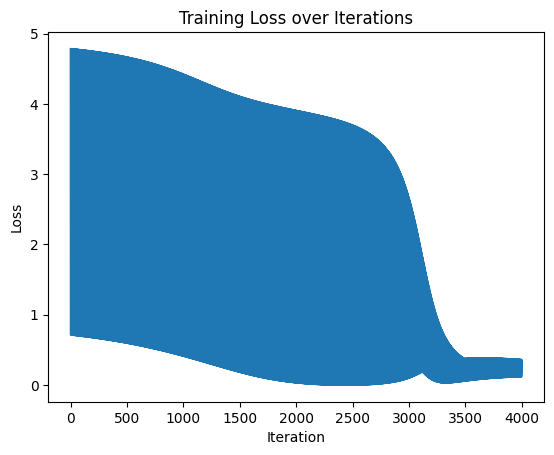

In [3]:
import matplotlib.pyplot as plt
plt.plot(L)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()

## Frontiers

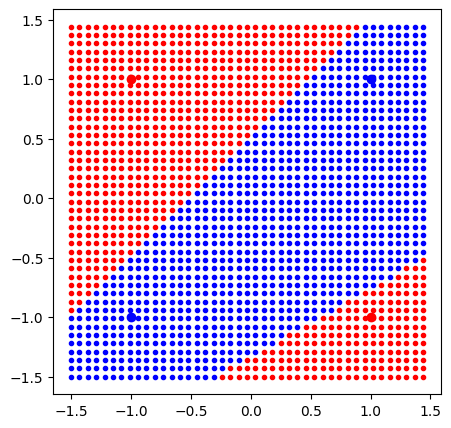

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisation des résultats
def plot_decision_boundary(model, X, Y):
    X = np.array(X)
    Y = np.array(Y)
    # cycle over 2D grid
    plt.figure(figsize=(5, 5))
    for i in np.arange(-1.5, 1.5, 0.07):
        for j in np.arange(-1.5, 1.5, 0.07):
            # eval model on each grid point
            [ypred1, ypred2] = model.forward(i, j, 0, 0)
            if ypred1 > ypred2:
                plt.plot(i, j, ".r")
            else:
                plt.plot(i, j, ".b")

    for i in range(Y.shape[0]):
        if Y[i][0] == 1 and Y[i][1] == 0:
            plt.plot(X[i, 0], X[i, 1], "ro")
        else:
            plt.plot(X[i, 0], X[i, 1], "bo")
    plt.show()

plot_decision_boundary(xor_model, X, Y)